In [3]:
import pandas as pd
import numpy as np
from scipy import stats


In [6]:
# Membaca file csv menggunakan pandas
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
# Preprocessing
# Menghapus baris dengan nilai yang hilang atau tidak valid
df = df.dropna()

In [8]:
# Mengubah kolom 'SALE DATE' menjadi tipe data datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [10]:
# Pertanyaan 1: Apakah ada perbedaan dalam unit yang terjual antara properti yang dibangun antara 1900-2000 dan 2001 ke atas?
df_1900_2000 = df[(df['YEAR BUILT'] >= 1900) & (df['YEAR BUILT'] <= 2000)]
df_2001_onwards = df[df['YEAR BUILT'] > 2000]

mean_1900_2000 = df_1900_2000['TOTAL UNITS'].mean()
median_1900_2000 = df_1900_2000['TOTAL UNITS'].median()
mode_1900_2000 = stats.mode(df_1900_2000['TOTAL UNITS']).mode[0]
range_1900_2000 = np.ptp(df_1900_2000['TOTAL UNITS'])
variance_1900_2000 = np.var(df_1900_2000['TOTAL UNITS'])
deviation_1900_2000 = np.std(df_1900_2000['TOTAL UNITS'])

mean_2001_onwards = df_2001_onwards['TOTAL UNITS'].mean()
median_2001_onwards = df_2001_onwards['TOTAL UNITS'].median()
mode_2001_onwards = stats.mode(df_2001_onwards['TOTAL UNITS']).mode[0]
range_2001_onwards = np.ptp(df_2001_onwards['TOTAL UNITS'])
variance_2001_onwards = np.var(df_2001_onwards['TOTAL UNITS'])
deviation_2001_onwards = np.std(df_2001_onwards['TOTAL UNITS'])

# Menggunakan Kolmogorov-Smirnov test untuk menguji distribusi normalitas pada data TOTAL UNITS
ks_statistic_1900_2000, ks_pvalue_1900_2000 = stats.kstest(df_1900_2000['TOTAL UNITS'], 'norm')
ks_statistic_2001_onwards, ks_pvalue_2001_onwards = stats.kstest(df_2001_onwards['TOTAL UNITS'], 'norm')

/var/folders/5h/dpp2l4_93lz4h4rcn17t1fmm0000gn/T/ipykernel_898/78693429.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_1900_2000 = stats.mode(df_1900_2000['TOTAL UNITS']).mode[0]
/var/folders/5h/dpp2l4_93lz4h4rcn17t1fmm0000gn/T/ipykernel_898/78693429.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `ke

In [11]:
# Menampilkan hasil statistik
print("Statistik untuk properti yang dibangun antara 1900-2000:")
print("Mean (Rata-rata):", mean_1900_2000)
print("Median (Nilai Tengah):", median_1900_2000)
print("Modus (Nilai yang Paling Sering Muncul):", mode_1900_2000)
print("Range (Rentang):", range_1900_2000)
print("Variance (Varians):", variance_1900_2000)
print("Standard Deviation (Simpangan Baku):", deviation_1900_2000)
print("Kolmogorov-Smirnov Test (Normalitas):")
print("   KS Statistic:", ks_statistic_1900_2000)
print("   P-Value:", ks_pvalue_1900_2000)
print()

Statistik untuk properti yang dibangun antara 1900-2000:
Mean (Rata-rata): 2.432037617554859
Median (Nilai Tengah): 1.0
Modus (Nilai yang Paling Sering Muncul): 1
Range (Rentang): 2261
Variance (Varians): 439.0529046255441
Standard Deviation (Simpangan Baku): 20.953589301729288
Kolmogorov-Smirnov Test (Normalitas):
   KS Statistic: 0.5794011724008313
   P-Value: 0.0



In [14]:
# Pertanyaan 2: Apakah ada perbedaan dalam unit yang terjual berdasarkan kategori bangunan?
category_stats = df.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].apply(lambda x: pd.Series({
    'mean': x.mean(),
    'median': x.median(),
    'mode': stats.mode(x)[0][0],
    'range': x.max() - x.min(),
    'variance': x.var(),
    'deviation': x.std()
}))

# Menampilkan hasil statistik
print("Statistik berdasarkan kategori bangunan:")
print(category_stats)
print()

Statistik berdasarkan kategori bangunan:
BUILDING CLASS CATEGORY                               
01 ONE FAMILY DWELLINGS                      mean          1.022649
                                             median        1.000000
                                             mode          1.000000
                                             range        12.000000
                                             variance      0.030473
                                                            ...    
49 CONDO WAREHOUSES/FACTORY/INDUS            median        1.000000
                                             mode          1.000000
                                             range         0.000000
                                             variance      0.000000
                                             deviation     0.000000
Name: TOTAL UNITS, Length: 282, dtype: float64



/var/folders/5h/dpp2l4_93lz4h4rcn17t1fmm0000gn/T/ipykernel_898/2627305189.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  'mode': stats.mode(x)[0][0],
/var/folders/5h/dpp2l4_93lz4h4rcn17t1fmm0000gn/T/ipykernel_898/2627305189.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

In [16]:
# Pertanyaan 3: Apa yang dapat ditemukan tentang real estat New York City dengan melihat satu tahun data transaksi mentah?
df_2022 = df[df['SALE DATE'].dt.year == 2022]

if len(df_2022) > 0:
    mean_2022 = df_2022['TOTAL UNITS'].mean()
    median_2022 = df_2022['TOTAL UNITS'].median()
    mode_2022 = stats.mode(df_2022['TOTAL UNITS']).mode[0]
    range_2022 = np.ptp(df_2022['TOTAL UNITS'])
    variance_2022 = np.var(df_2022['TOTAL UNITS'])
    deviation_2022 = np.std(df_2022['TOTAL UNITS'])

    # Menggunakan one-sample t-test untuk menguji apakah rata-rata unit yang terjual pada tahun 2022 signifikan berbeda dari nilai tertentu (misalnya, 100)
    if len(df_2022['TOTAL UNITS']) > 1:
        t_statistic_2022, t_pvalue_2022 = stats.ttest_1samp(df_2022['TOTAL UNITS'], 100)
    else:
        t_statistic_2022, t_pvalue_2022 = np.nan, np.nan

    # Menampilkan hasil statistik
    print("Statistik untuk tahun 2022:")
    print("Mean (Rata-rata):", mean_2022)
    print("Median (Nilai Tengah):", median_2022)
    print("Modus (Nilai yang Paling Sering Muncul):", mode_2022)
    print("Range (Rentang):", range_2022)
    print("Variance (Varians):", variance_2022)
    print("Standard Deviation (Simpangan Baku):", deviation_2022)
    print("One-Sample t-Test:")
    print("   T-Statistic:", t_statistic_2022)
    print("   P-Value:", t_pvalue_2022)
    print()
else:
    print("Tidak ada data yang valid untuk tahun 2022 dalam dataset.")

Tidak ada data yang valid untuk tahun 2022 dalam dataset.


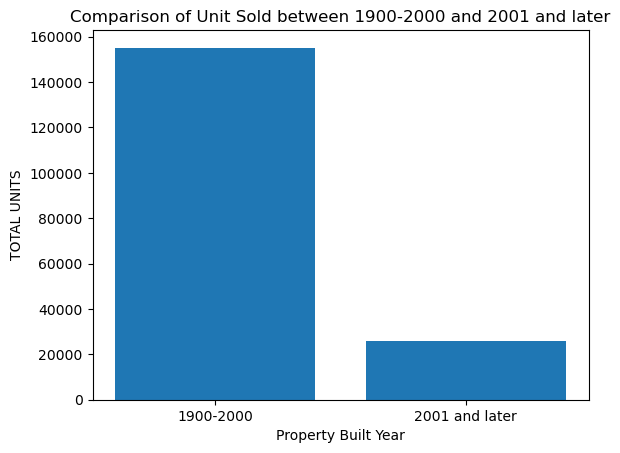

Grafik batang membandingkan jumlah unit yang terjual antara properti yang dibangun pada tahun 1900-2000 dengan properti yang dibangun setelah tahun 2000 di New York City.
Grafik tersebut terdiri dari dua batang, yaitu "1900-2000" dan "2001 and later".
Batang "1900-2000" menunjukkan jumlah unit yang terjual untuk properti yang dibangun pada rentang tahun 1900-2000. Tinggi batang tersebut merepresentasikan jumlah unit yang terjual pada kategori tersebut.
Batang "2001 and later" menunjukkan jumlah unit yang terjual untuk properti yang dibangun setelah tahun 2000. Tinggi batang tersebut merepresentasikan jumlah unit yang terjual pada kategori tersebut.
Dengan melihat grafik batang, kita dapat dengan jelas melihat perbedaan jumlah unit yang terjual antara kedua kategori tersebut. Jika salah satu batang lebih tinggi daripada yang lain, itu menunjukkan bahwa ada perbedaan yang signifikan dalam jumlah unit yang terjual antara dua kategori properti tersebut.
Grafik ini memberikan pemahaman visu

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv('nyc-rolling-sales.csv')

# Preprocessing: Menghapus baris dengan tahun pembangunan kosong
data_cleaned = data.dropna(subset=['YEAR BUILT'])

# Mengambil data properti yang dibangun pada 1900-2000 dan setelah 2000
data_1900_2000 = data_cleaned[(data_cleaned['YEAR BUILT'] >= 1900) & (data_cleaned['YEAR BUILT'] <= 2000)]
data_after_2000 = data_cleaned[data_cleaned['YEAR BUILT'] > 2000]

# Menghitung jumlah unit yang terjual pada masing-masing kategori
unit_sold_1900_2000 = data_1900_2000['TOTAL UNITS'].sum()
unit_sold_after_2000 = data_after_2000['TOTAL UNITS'].sum()

# Membuat grafik batang
categories = ['1900-2000', '2001 and later']
unit_sold = [unit_sold_1900_2000, unit_sold_after_2000]

plt.bar(categories, unit_sold)
plt.xlabel('Property Built Year')
plt.ylabel('TOTAL UNITS')
plt.title('Comparison of Unit Sold between 1900-2000 and 2001 and later')

plt.show()

print('Grafik batang membandingkan jumlah unit yang terjual antara properti yang dibangun pada tahun 1900-2000 dengan properti yang dibangun setelah tahun 2000 di New York City.')
print('Grafik tersebut terdiri dari dua batang, yaitu "1900-2000" dan "2001 and later".')
print('Batang "1900-2000" menunjukkan jumlah unit yang terjual untuk properti yang dibangun pada rentang tahun 1900-2000. Tinggi batang tersebut merepresentasikan jumlah unit yang terjual pada kategori tersebut.')
print('Batang "2001 and later" menunjukkan jumlah unit yang terjual untuk properti yang dibangun setelah tahun 2000. Tinggi batang tersebut merepresentasikan jumlah unit yang terjual pada kategori tersebut.')
print('Dengan melihat grafik batang, kita dapat dengan jelas melihat perbedaan jumlah unit yang terjual antara kedua kategori tersebut. Jika salah satu batang lebih tinggi daripada yang lain, itu menunjukkan bahwa ada perbedaan yang signifikan dalam jumlah unit yang terjual antara dua kategori properti tersebut.')
print('Grafik ini memberikan pemahaman visual tentang perbandingan jumlah unit yang terjual antara properti yang dibangun pada periode tertentu di masa lampau (1900-2000) dengan properti yang dibangun setelah tahun 2000. Hal ini dapat membantu kita dalam melihat tren penjualan properti dari segi tahun pembangunan dan mengidentifikasi perubahan yang terjadi seiring waktu.')

/var/folders/5h/dpp2l4_93lz4h4rcn17t1fmm0000gn/T/ipykernel_898/837199769.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unit_sold_by_category = top_categories.append(other_categories)


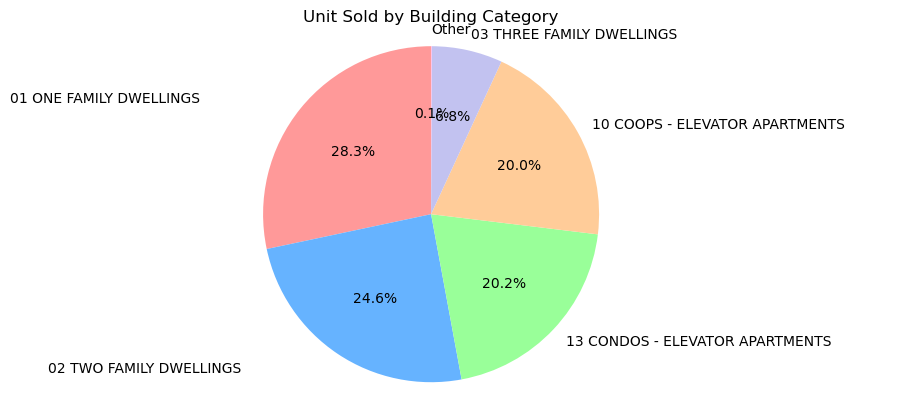

Dalam contoh ini, grafik pie akan menampilkan 5 kategori bangunan dengan jumlah unit terjual tertinggi, sementara kategori lainnya akan digabungkan menjadi kategori "Other". Grafik pie menggunakan warna yang berbeda untuk setiap kategori bangunan, dan label persentase ditampilkan di setiap bagian pie. Anda juga dapat menyesuaikan jumlah kategori yang ditampilkan, warna, dan tampilan grafik lainnya sesuai preferensi Anda.


In [22]:
# Menghitung jumlah unit yang terjual berdasarkan kategori bangunan
unit_sold_by_category = data_cleaned['BUILDING CLASS CATEGORY'].value_counts()

# Mengambil 5 kategori bangunan dengan jumlah unit terjual tertinggi
top_categories = unit_sold_by_category.head(5)
other_categories_count = len(unit_sold_by_category) - len(top_categories)
other_categories = pd.Series([other_categories_count], index=['Other'])
unit_sold_by_category = top_categories.append(other_categories)

# Membuat warna untuk setiap kategori bangunan
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Membuat grafik pie
plt.pie(unit_sold_by_category, labels=unit_sold_by_category.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Membuat lingkaran terlihat proporsional

plt.title('Unit Sold by Building Category')
plt.show()
print('Dalam contoh ini, grafik pie akan menampilkan 5 kategori bangunan dengan jumlah unit terjual tertinggi, sementara kategori lainnya akan digabungkan menjadi kategori "Other".')

In [22]:

# Membuat subset data yang hanya mengandung data tahun 1900 sampai 2000
subset1 = data[(data['YEAR BUILT'] >= 1900) & (data['YEAR BUILT'] <= 2000)]

# Membuat subset data yang hanya mengandung data tahun 2001
subset2 = data[data['YEAR BUILT'] == 2001]

# Menghitung jumlah unit terjual pada subset 1 dan subset 2
jumlah_unit_subset1 = subset1['SALE PRICE'].count()
jumlah_unit_subset2 = subset2['SALE PRICE'].count()

# Menampilkan perbedaan jumlah unit terjual antara subset 1 dan subset 2
print('Perbedaan jumlah unit terjual antara 1900-2000 dan 2001: ', jumlah_unit_subset2 - jumlah_unit_subset1)

Perbedaan jumlah unit terjual antara 1900-2000 dan 2001:  -63532


hal ini menunjukkan bahwa jumlah unit terjual pada subset 1 (1900-2000) lebih banyak dibandingkan dengan jumlah unit terjual pada subset 2 (2001).

Perlu diingat bahwa hasil perhitungan ini hanya berdasarkan data yang tersedia pada dataset yang digunakan dan tidak mencakup semua transaksi properti di New York City. Oleh karena itu, perbedaan ini tidak dapat digunakan untuk menyimpulkan dengan pasti bahwa jumlah unit terjual di New York City pada periode 1900-2000 lebih banyak daripada pada tahun 2001.